In [2]:
from extinction import fitzpatrick99
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Setting filter colours for later plotting
filter_colours = {'u': '#6A5ACD', 'g': '#2ca02c', 'r': '#d62728', 'i': '#ff7f0e', 'z': '#8c564b', 'y': '#1b1b1b'}
path = "merged_lightcurves/split_01_train_clean.csv"
df = pd.read_csv(path)



In [3]:
from extinction import fitzpatrick99

u_eff_wl = np.array([3641]); g_eff_wl = np.array([4704]); r_eff_wl = np.array([6155])
i_eff_wl = np.array([7504]); z_eff_wl = np.array([8695]); y_eff_wl = np.array([10056])

#Defining function to de-extinct a set of flux values
def jurassic_park (flux, eff_wl, ebv):
    A_lambda = fitzpatrick99(eff_wl, ebv * 3.1) #3.1 = Standard Milky Way value
    flux_ext = flux * 10**((A_lambda)/2.5)
    return flux_ext, A_lambda

In [4]:

def draw_graph_raw(object_ID):
    object_log = df.loc[df['object_id'] == object_ID]
    u_mask = ((df['Filter'] == 'u') & (df['object_id'] == object_ID))
    g_mask = ((df['Filter'] == 'g') & (df['object_id'] == object_ID))
    r_mask = ((df['Filter'] == 'r') & (df['object_id'] == object_ID))
    i_mask = ((df['Filter'] == 'i') & (df['object_id'] == object_ID))
    z_mask = ((df['Filter'] == 'z') & (df['object_id'] == object_ID))
    y_mask = ((df['Filter'] == 'y') & (df['object_id'] == object_ID))

    u_flux = np.array(df.loc[u_mask, 'Flux']); u_time = np.array(df.loc[u_mask, 'Time (MJD)']); u_err = np.array(df.loc[u_mask, 'Flux_err'])
    g_flux = np.array(df.loc[g_mask, 'Flux']); g_time = np.array(df.loc[g_mask, 'Time (MJD)']); g_err = np.array(df.loc[g_mask, 'Flux_err'])
    r_flux = np.array(df.loc[r_mask, 'Flux']); r_time = np.array(df.loc[r_mask, 'Time (MJD)']); r_err = np.array(df.loc[r_mask, 'Flux_err'])
    i_flux = np.array(df.loc[i_mask, 'Flux']); i_time = np.array(df.loc[i_mask, 'Time (MJD)']); i_err = np.array(df.loc[i_mask, 'Flux_err'])
    z_flux = np.array(df.loc[z_mask, 'Flux']); z_time = np.array(df.loc[z_mask, 'Time (MJD)']); z_err = np.array(df.loc[z_mask, 'Flux_err'])
    y_flux = np.array(df.loc[y_mask, 'Flux']); y_time = np.array(df.loc[y_mask, 'Time (MJD)']); y_err = np.array(df.loc[y_mask, 'Flux_err'])

    red_shift = object_log['Z'].iloc[0]
    ebv = object_log['EBV'].iloc[0]
    SpecType = object_log['SpecType'].iloc[0]
    
    u_flux, u_A_lambda = jurassic_park(u_flux,u_eff_wl, ebv); g_flux, g_A_lambda = jurassic_park(g_flux,g_eff_wl, ebv)
    r_flux, r_A_lambda = jurassic_park(r_flux,r_eff_wl, ebv); i_flux, i_A_lambda = jurassic_park(i_flux,i_eff_wl, ebv)
    z_flux, z_A_lumbda = jurassic_park(z_flux,z_eff_wl, ebv) ;y_flux, y_A_lambda = jurassic_park(y_flux,y_eff_wl, ebv)

    print(f'u band extinction = {u_A_lambda}'); print(f'g band extinction = {g_A_lambda}'); print(f'r band extinction = {r_A_lambda}')
    print(f'i band extinction = {i_A_lambda}'); print(f'z band extinction = {z_A_lumbda}'); print(f'y band extinction = {y_A_lambda}')
    
    plt.figure(figsize = [10,6])
    plt.errorbar(u_time,u_flux, yerr= u_err,label='u', fmt = '.',color = filter_colours['u'],zorder=4)
    plt.errorbar(g_time,g_flux,yerr=g_err, label='g', fmt = '.', color = filter_colours['g'],zorder=5)
    plt.errorbar(r_time,r_flux,yerr = r_err, label='r', fmt = '.', color = filter_colours['r'],zorder=6)
    plt.errorbar(i_time,i_flux,yerr = i_err, label='i', fmt = '.', color = filter_colours['i'],zorder=3)
    plt.errorbar(z_time,z_flux,yerr = z_err, label='z', fmt = '.', color = filter_colours['z'],zorder=2)
    plt.errorbar(y_time,y_flux,yerr = y_err, label='y', fmt = '.', color = filter_colours['y'],zorder=1)
    plt.xlabel('Days (MJD)')
    plt.ylabel('Flux (μJy)')
    plt.legend()
    plt.suptitle(f"{object_ID}")
    plt.show()

    print("===Done====")


=====TDE=========
The first tde : amon_imloth_luin
u band extinction = [0.26116086]
g band extinction = [0.20746283]
r band extinction = [0.14256113]
i band extinction = [0.1049135]
z band extinction = [0.08188936]
y band extinction = [0.06363456]


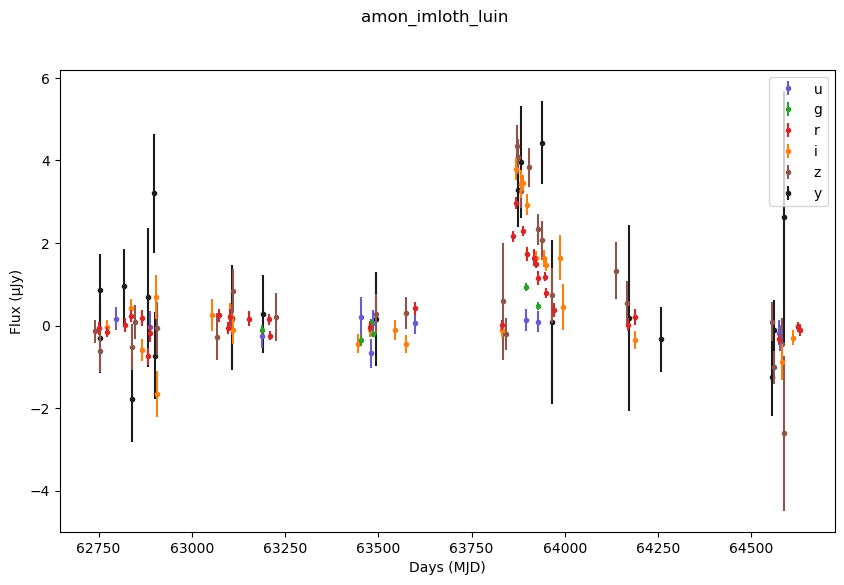

===Done====
The first tde : tobas_Elrim_salph
u band extinction = [0.30389628]
g band extinction = [0.24141129]
r band extinction = [0.16588931]
i band extinction = [0.12208116]
z band extinction = [0.09528944]
y band extinction = [0.07404749]


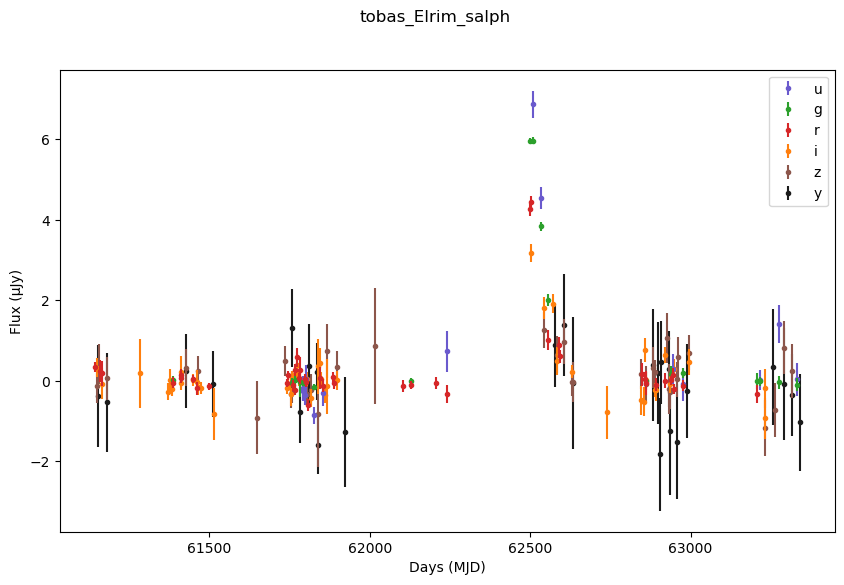

===Done====
The first tde : ram_thavron_rusc
u band extinction = [0.05223217]
g band extinction = [0.04149257]
r band extinction = [0.02851223]
i band extinction = [0.0209827]
z band extinction = [0.01637787]
y band extinction = [0.01272691]


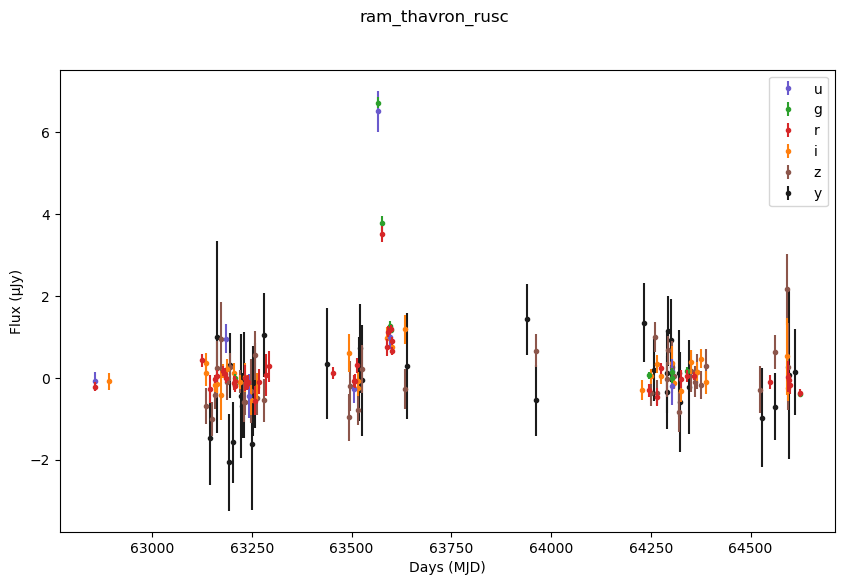

===Done====
////////////////////////////////////////////////////
===========Non-TDE========
The first non tde: fuin_bragol_talraph
u band extinction = [0.06172893]
g band extinction = [0.04903667]
r band extinction = [0.03369627]
i band extinction = [0.02479774]
z band extinction = [0.01935567]
y band extinction = [0.0150409]


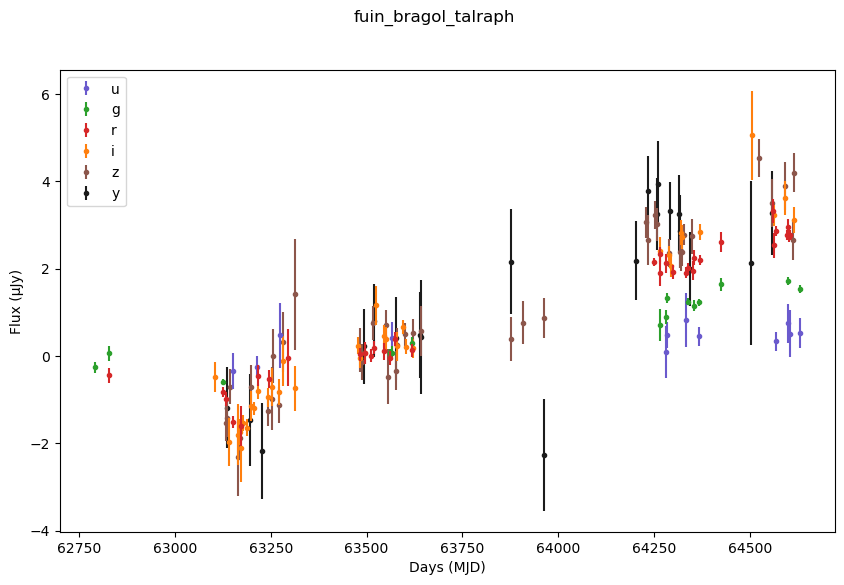

===Done====
The first non tde: baneth_pilin_tachol
u band extinction = [0.09021921]
g band extinction = [0.07166898]
r band extinction = [0.04924839]
i band extinction = [0.03624284]
z band extinction = [0.02828905]
y band extinction = [0.02198285]


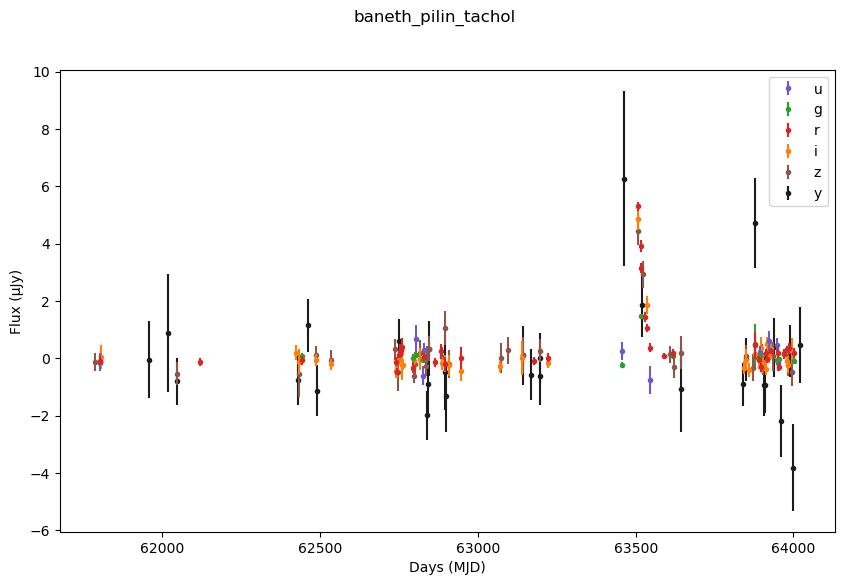

===Done====
The first non tde: imrad_nothrim_Sindarin
u band extinction = [0.06647731]
g band extinction = [0.05280872]
r band extinction = [0.03628829]
i band extinction = [0.02670525]
z band extinction = [0.02084456]
y band extinction = [0.01619789]


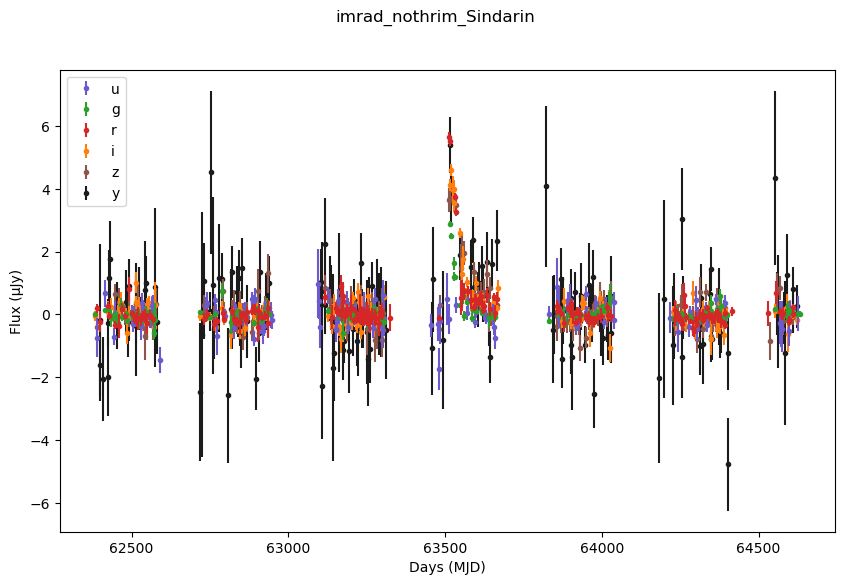

===Done====


In [5]:
print('=====TDE=========')
TDE = ['amon_imloth_luin', 'tobas_Elrim_salph', 'ram_thavron_rusc']
for i in TDE:
    print(f"The first tde : {i}")
    draw_graph_raw(i)

print('////////////////////////////////////////////////////')

print("===========Non-TDE========")
non_tde = ['fuin_bragol_talraph', 'baneth_pilin_tachol', 'imrad_nothrim_Sindarin']
for i in non_tde:
    print(f"The first non tde: {i}")
    draw_graph_raw(i)
